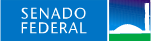

   # Análise dos reembolsos CEAPS - 2008 a 2019

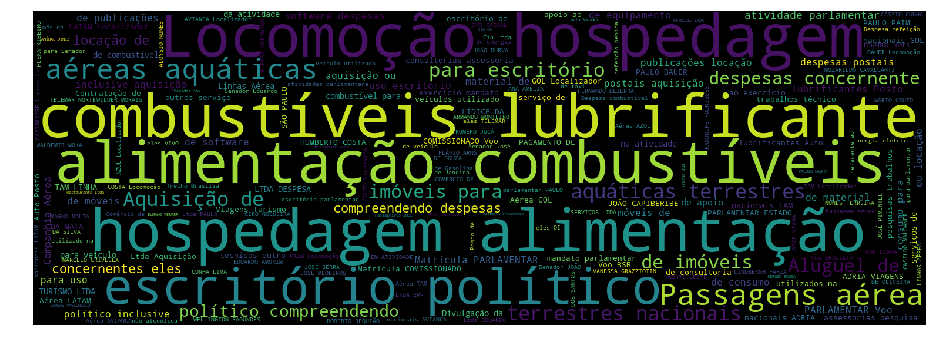

O QUE É CEAPS?

CEAPS (Cota para o Exercício da Atividade Parlamentar dos Senadores), é o valor que os Senadores têm direito a receber para cobrir despesas em função da sua atividade como parlamentar no Senado Federal.

Essa cota é uma junção da verba de transporte aéreo (quantia variável por estado correspondente a cinco trechos aéreos entre a capital do parlamentar e Brasília) e da verba indenizatória (quantia destinada aos outros gastos cobertos pelo benefício).


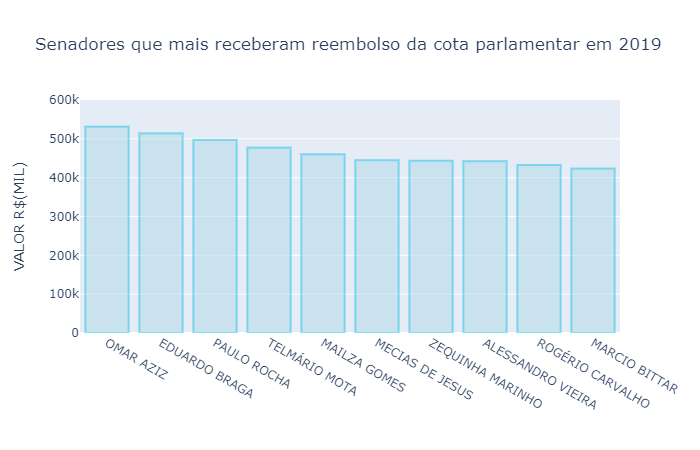

O mandato dos Senadores é de 8 anos.
A cada 4 anos há eleição, com renovação alternada de 1/3 e 2/3 dos 81 senadores.

Eleições de 4 em 4 anos:

2006 (Mandato 2007 - 2014)

2010 (Mandato 2011 - 2018)

2014 (Mandato 2015 - 2022)

2018 (Mandato 2019 - 2026)

***Os arquivos com os dados abertos das CEAPS começaram a ser disponibilizados a partir de 2008.**

Perguntas:
- Qual o valor total de reembolsos CEAPS pagos no período de 2008 a 2019?
- Quem são os 10 Senadores que mais receberam reembolso CEAPS entre 2008 a 2019?
- Quais foram os 10 maiores valores unitários de reembolso entre 2008 e 2019?
- Quem são os 10 Senadores que mais receberam reembolso em 2019?
- Quais foram os 10 maiores valores de reembolso em 2019?
- Quantos anos de mandato cada Senador exerceu?
- Qual a quantidade de reembolsos por tipo de despesa?
- Quais são os valores totais de reembolsos por tipo de despesa em 2019?
- Quais palavras chaves mais frequentes no dataset?

### Importando as Bibliotecas principais

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
%matplotlib inline
%pylab inline

### Carregando a base de dados

In [ ]:
df = pd.read_csv("../input/dados-abertos-ceaps/CEAPS_2008_2019.csv")

### Visualizando o tipo de variável de cada atributo

In [ ]:
df.info()

### Visualizando 10 linhas aleatórias da base de dados

In [ ]:
df.sample(10)

### Excluindo o atributo "Documento"

In [ ]:
df.drop('DOCUMENTO', axis=1, inplace=True) 

### Verificando a presença de valores nulos

In [ ]:
df.isnull().any()

### Tratando os valores nulos 

In [ ]:
df.CNPJ_CPF = df.CNPJ_CPF.fillna('Nao Informado')
df.FORNECEDOR = df.FORNECEDOR.fillna('Nao Informado')
df.DETALHAMENTO = df.DETALHAMENTO.fillna('Nao Informado')
df.DATA = df.DATA.fillna('Nao Informado')

### Verificando registros nulos em "VALOR_REEMBOLSADO"

In [ ]:
df[df['VALOR_REEMBOLSADO'].isnull()]

#### *Alterando registros nulos nas linhas 149869 e 149876. Provavelmente o valor reembolsado foi digitado por engano no atributo "DETALHAMENTO". 

In [ ]:
df.loc[[149869],'VALOR_REEMBOLSADO']=df.loc[[149869],'VALOR_REEMBOLSADO'].replace(NaN, 469.53)
df.loc[[149876],'VALOR_REEMBOLSADO']=df.loc[[149876],'VALOR_REEMBOLSADO'].replace(NaN, 460.45)

In [ ]:
df.loc[[149869,149876]]

In [ ]:
df.isnull().any()

In [ ]:
df.info()

### Verificando se há valores inconsistentes no atributo "VALOR_REEMBOLSADO"

In [ ]:
df[df['VALOR_REEMBOLSADO']<0]

### Convertendo os valores negativos para valores absolutos

In [ ]:
df['VALOR_REEMBOLSADO'] = abs(df['VALOR_REEMBOLSADO'])

### Dados estatísticos dos valores reembolsados

In [ ]:
df['VALOR_REEMBOLSADO'].describe().round(2)

### Abreviando textos longos do atributo "TIPO_DESPESA"

In [ ]:
df['TIPO_DESPESA']=df['TIPO_DESPESA'].replace("Aluguel de imóveis para escritório político, compreendendo despesas concernentes a eles. ", "Aluguel imóveis para escritório político e despesas concernentes")

In [ ]:
df['TIPO_DESPESA']=df['TIPO_DESPESA'].replace("Aquisição de material de consumo para uso no escritório político, inclusive aquisição ou locação de software, despesas postais, aquisição de publicações, locação de móveis e de equipamentos. " 
, "Material de consumo escritório, aquisição ou locação software, despesas postais, locação móveis e equiptos")

In [ ]:
df['TIPO_DESPESA']=df['TIPO_DESPESA'].replace("Contratação de consultorias, assessorias, pesquisas, trabalhos técnicos e outros serviços de apoio ao exercício do mandato parlamentar", "Contratação consultorias, assessorias, pesquisas, trabalhos técnicos, outros serviços de apoio")

In [ ]:
df['TIPO_DESPESA'].sample(10)

### Qual o valor total de reembolsos CEAPS pagos no período 2008 - 2019?

In [ ]:
df['VALOR_REEMBOLSADO'].sum().round(2)

### Importando os módulos para visualização de gráficos interativos

In [ ]:
import cufflinks as cf
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import iplot

cf.go_offline()

### Qual o valor total de reembolsos CEAPS por ano no período 2008 a 2019?

In [ ]:
ceaps_por_ano = df.groupby('ANO')['VALOR_REEMBOLSADO'].sum()

data = [go.Bar(x=ceaps_por_ano.index,
               y=ceaps_por_ano.values,
               marker = {'color': '#feca57',
                         'line': {'color': '#ff9f43',
                                  'width': 2}}, opacity= 0.5)]

# Layout
config_layout = go.Layout(title='Total de Gastos dos Senadores - CEAPS 2008 a 2019',
                                yaxis={'title':'VALOR R$(milhões)','range':[0, 30000000]},
                                xaxis={'title':''})
                                 
# Objeto figura
fig = go.Figure(data=data, layout=config_layout)

# plotando grafico
py.iplot(fig)

### Agrupando por ano os 10 Senadores com maiores valores de reembolso CEAPS

In [ ]:
top10_2008 = df[df['ANO']==2008].groupby(['ANO','SENADOR'])['VALOR_REEMBOLSADO'].sum().sort_values(ascending=False).head(10)
top10_2009 = df[df['ANO']==2009].groupby(['ANO','SENADOR'])['VALOR_REEMBOLSADO'].sum().sort_values(ascending=False).head(10)
top10_2010 = df[df['ANO']==2010].groupby(['ANO','SENADOR'])['VALOR_REEMBOLSADO'].sum().sort_values(ascending=False).head(10)
top10_2011 = df[df['ANO']==2011].groupby(['ANO','SENADOR'])['VALOR_REEMBOLSADO'].sum().sort_values(ascending=False).head(10)
top10_2012 = df[df['ANO']==2012].groupby(['ANO','SENADOR'])['VALOR_REEMBOLSADO'].sum().sort_values(ascending=False).head(10)
top10_2013 = df[df['ANO']==2013].groupby(['ANO','SENADOR'])['VALOR_REEMBOLSADO'].sum().sort_values(ascending=False).head(10)
top10_2014 = df[df['ANO']==2014].groupby(['ANO','SENADOR'])['VALOR_REEMBOLSADO'].sum().sort_values(ascending=False).head(10)
top10_2015 = df[df['ANO']==2015].groupby(['ANO','SENADOR'])['VALOR_REEMBOLSADO'].sum().sort_values(ascending=False).head(10)
top10_2016 = df[df['ANO']==2016].groupby(['ANO','SENADOR'])['VALOR_REEMBOLSADO'].sum().sort_values(ascending=False).head(10)
top10_2017 = df[df['ANO']==2017].groupby(['ANO','SENADOR'])['VALOR_REEMBOLSADO'].sum().sort_values(ascending=False).head(10)
top10_2018 = df[df['ANO']==2018].groupby(['ANO','SENADOR'])['VALOR_REEMBOLSADO'].sum().sort_values(ascending=False).head(10)
top10_2019 = df[df['ANO']==2019].groupby(['ANO','SENADOR'])['VALOR_REEMBOLSADO'].sum().sort_values(ascending=False).head(10)

### Concatenando os arquivos 

In [ ]:
top10_total = pd.concat([top10_2008, top10_2009, top10_2010, top10_2011, top10_2012, top10_2012, top10_2013, top10_2014, top10_2015, 
                         top10_2016, top10_2017, top10_2018, top10_2019], sort=False)

### Quem são os 10 Senadores que mais receberam CEAPS entre 2008 a 2019?

In [ ]:
df.groupby('SENADOR')['VALOR_REEMBOLSADO'].sum().sort_values(ascending=False).to_frame().head(10)

### Quais foram os 10 maiores valores unitários de reembolso entre 2008 e 2019?

In [ ]:
df.nlargest(10, 'VALOR_REEMBOLSADO')

### Quantos reembolsos cada Senador solicitou entre 2008 a 2019?

In [ ]:
df.groupby('SENADOR')['ANO'].value_counts()

### Quem são os 10 Senadores que mais receberam reembolso em 2019?

In [ ]:
top10_2019

### Gráfico dos 10 Senadores que mais receberam reembolso em 2019

In [ ]:
top10_2019 = top10_2019.groupby('SENADOR').sum().sort_values(ascending=False)

data = [go.Bar(x=top10_2019.index,
               y=top10_2019.values,
               marker = {'color': 'lightblue',
                         'line': {'color': '#0abde3',
                                  'width': 2}}, opacity= 0.5)]

# Layout
config_layout = go.Layout(title='Os 10 Senadores que mais receberam reembolso CEAPS em 2019',
                                 yaxis={'title':'VALOR R$(MIL)','range':[0, 600000]},
                                 xaxis={'title':''})

# Objeto figura
fig = go.Figure(data=data, layout=config_layout)

# plotando grafico
py.iplot(fig)

### Quais foram os 10 maiores valores de reembolso CEAPS em 2019?

In [ ]:
df[df['ANO']==2019].nlargest(10, "VALOR_REEMBOLSADO")

### Quantos anos de mandato cada Senador exerceu?

In [ ]:
df_mandato = df[['SENADOR','ANO']].drop_duplicates()
df_mandato = df_mandato.groupby('SENADOR').count()
df_mandato.rename(columns={'ANO': 'ANOS_MANDATO'}).sample(20) #Exemplo com 20 candidatos aleatórios

### Quanto cada Senador recebeu por ano?

In [ ]:
df.groupby(['SENADOR','ANO'])[['VALOR_REEMBOLSADO']].sum().head(20) # Exemplo com os 20 primeiros em ordem alfabética

### Quais os 10 maiores valores totais de reembolso pago em cada ano aos Senadores?

In [ ]:
top10_total.groupby(['SENADOR','ANO']).sum().sort_values(ascending=False)

### Qual a quantidade total de reembolsos por tipo de despesa de 2008 a 2019?

In [ ]:
df['TIPO_DESPESA'].value_counts()

### Quais são os valores totais de reembolsos por tipo de despesa entre 2008 a 2019?

In [ ]:
df.groupby('TIPO_DESPESA')['VALOR_REEMBOLSADO'].sum().sort_values(ascending=False).round()

### Quais os valores totais de reembolso por "TIPO DESPESA" em 2019?

In [ ]:
#2019
df_19 = df[df['ANO']==2019]
df_19.groupby('TIPO_DESPESA')['VALOR_REEMBOLSADO'].sum().sort_values(ascending=True).plot.barh()
plt.xlim(0,8000000)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.xlabel('Milhões', fontsize=14)
plt.title('Total de gastos por Categoria - 2019', backgroundcolor='#FFDD33')
plt.ylabel('')

### Distribuição dos Valores Reembolsados entre 2008 a 2019

In [ ]:
sns.catplot(x="ANO", y="VALOR_REEMBOLSADO", kind='boxen', palette="Set2", data=df)
plt.title("Distribuição dos Valores Reembolsados 2008 a 2019")
plt.gcf().set_size_inches(12, 8)

### Quais palavras chaves mais frequentes no dataset?

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = open("../input/dados-abertos-ceaps/CEAPS_2008_2019.csv", encoding='utf-8').read()
wordcloud = WordCloud(max_font_size=100,width = 1520, height = 535).generate(text)
plt.figure(figsize=(16,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()